# Temporal Average Testing

Test procedure:
- XCDAT is source-installed from branch `feature/201-temporal-mean`
- PR: https://github.com/xCDAT/xcdat/pull/236

## Load test data -- daily, 6 yr dataset

In [1]:
import os

In [2]:
demo_data_dir = '../tutorials/demo_data/CMIP5_demo_timeseries/historical/atmos/day/pr'
demo_filename = 'pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc'
demo_file = os.path.join(demo_data_dir, demo_filename)

In [3]:
import xcdat

In [4]:
ds = xcdat.open_dataset(demo_file)

In [5]:
pr = ds.pr

In [6]:
pr

<xarray.DataArray 'pr' (time: 2190, lat: 90, lon: 144)>
[28382400 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-01-01 12:00:00 ... 2005-12-31 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    comment:           at surface; includes both liquid and solid phases from...
    units:             kg m-2 s-1
    original_name:     dummy
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2013-04-18T19:18:11Z altered by CMOR: replaced missing...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

## 1. Temporal Average

### 1.1 Default (`center_times=False`, `weighted=True`)

In [7]:
ds_ave_month = ds.temporal.average("pr")

In [8]:
ds_ave_month = ds.temporal.average("pr", weighted=True)

In [9]:
ds_ave_month.pr.shape

(90, 144)

In [10]:
ds_ave_month

<xarray.Dataset>
Dimensions:   (lat: 90, bnds: 2, lon: 144)
Coordinates:
  * lat       (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    pr        (lat, lon) float64 7.904e-07 7.904e-07 ... 3.448e-06 3.448e-06
Attributes: (12/27)
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          historical
    source:                 GISS-E2-H-Eh135f9f Atmosphere: GISS-E2; Ocean: H
    model_id:               GISS-E2-H
    forcing:                GHG, LU, Sl, Vl, BC, OC, SA, Oz (also includes BC...
    ...                     ...
    table_id:               Table day (27 April 2011) 86d1558d99b6ed1e7a886ab...
    title:                  GISS-E2-H model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            6
    cmor_version:           2.5.7

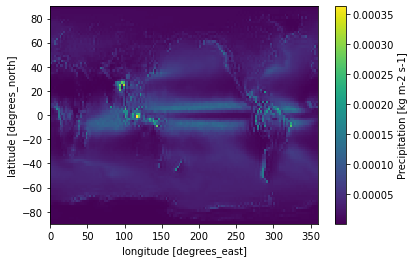

In [11]:
ds_ave_month.pr.plot()

### 1.2 `weighted=False`

In [12]:
ds_ave_month_nw = ds.temporal.average("pr", weighted=False)

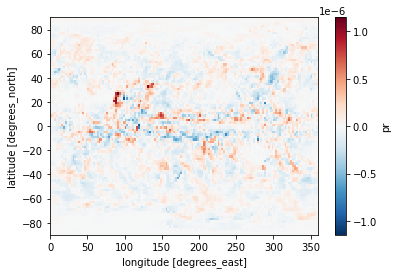

In [13]:
(ds_ave_month.pr - ds_ave_month_nw.pr).plot()

### 1.3 `center_times=True`

In [14]:
ds_ave_month_center = ds.temporal.average("pr", center_times=True)

In [15]:
ds_ave_month_center.pr.shape

(90, 144)

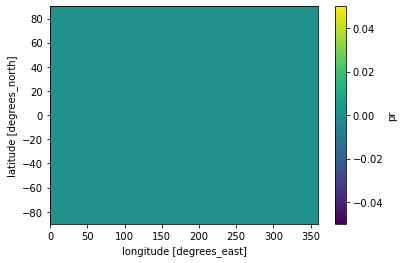

In [16]:
(ds_ave_month.pr - ds_ave_month_center.pr).plot()

## 2. Group Average

### 2.1 Day

In [17]:
ds_gra_day = ds.temporal.group_average("pr", freq="day")

In [18]:
ds_gra_day.pr.shape

(2190, 90, 144)

In [19]:
ds_gra_day.pr[0] - ds.pr[0]

<xarray.DataArray 'pr' (lat: 90, lon: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8

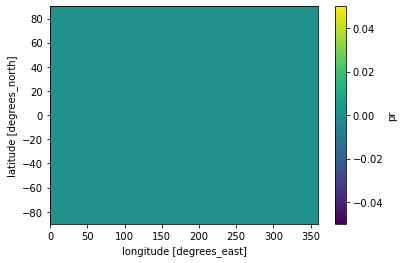

In [20]:
(ds_gra_day.pr[-1]-ds.pr[-1]).plot()  # Just checking there ARE same

### 2.2 Month

In [21]:
ds_gra_month = ds.temporal.group_average("pr", freq="month")

In [22]:
ds_gra_month.pr.shape

(72, 90, 144)

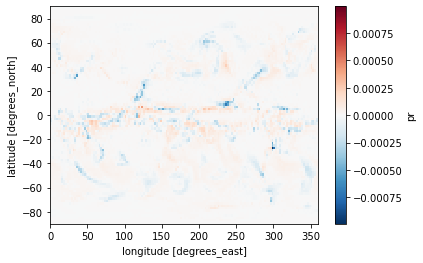

In [23]:
(ds_gra_month.pr[0]-ds.pr[0]).plot()  # Just checking there are NOT same

### 2.3 Year

In [24]:
ds_gra_year = ds.temporal.group_average("pr", freq="year")

In [25]:
ds_gra_year.pr.shape

(6, 90, 144)

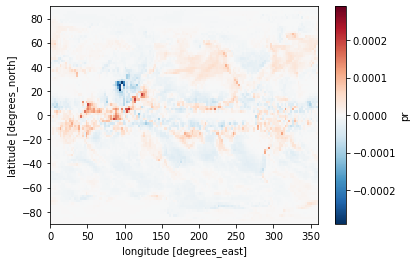

In [26]:
(ds_gra_month.pr[-1]-ds_gra_year.pr[-1]).plot()  # Just checking there are NOT same

### 2.4 Season

In [27]:
ds_gra_season = ds.temporal.group_average("pr", freq="season")

In [28]:
ds_gra_season.pr.shape

(25, 90, 144)

In [29]:
ds_gra_season

<xarray.Dataset>
Dimensions:   (lat: 90, bnds: 2, lon: 144, time: 25)
Coordinates:
  * lat       (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) datetime64[ns] 2000-01-01 2000-04-01 ... 2006-01-01
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    pr        (time, lat, lon) float32 1.85e-06 1.85e-06 ... 1.717e-06 1.717e-06
Attributes: (12/27)
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          historical
    source:                 GISS-E2-H-Eh135f9f Atmosphere: GISS-E2; Ocean: H
    model_id:               GISS-E2-H
    forcing:                GHG, LU, Sl, Vl, BC, OC, SA, Oz (also includes BC...
    ...                     ...
    table_id:               Table day (27 April 2011) 86d1558d99b6ed1e7a886ab...
    title:                  GISS-E2-H model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            6
    cmor_version:           2.5.7

In [30]:
season_config_dict = {"dec_mode": "DJF", "drop_incomplete_djf": True}
ds_gra_season2 = ds.temporal.group_average("pr", freq="season", season_config=season_config_dict)

In [31]:
ds_gra_season2.pr.shape

(25, 90, 144)

In [32]:
ds_gra_season2

<xarray.Dataset>
Dimensions:   (lat: 90, lon: 144, bnds: 2, time: 25)
Coordinates:
  * lat       (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) datetime64[ns] 2000-01-01 2000-04-01 ... 2006-01-01
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    pr        (time, lat, lon) float32 1.858e-06 1.858e-06 ... 1.727e-06
Attributes: (12/27)
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          historical
    source:                 GISS-E2-H-Eh135f9f Atmosphere: GISS-E2; Ocean: H
    model_id:               GISS-E2-H
    forcing:                GHG, LU, Sl, Vl, BC, OC, SA, Oz (also includes BC...
    ...                     ...
    table_id:               Table day (27 April 2011) 86d1558d99b6ed1e7a886ab...
    title:                  GISS-E2-H model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            6
    cmor_version:           2.5.7

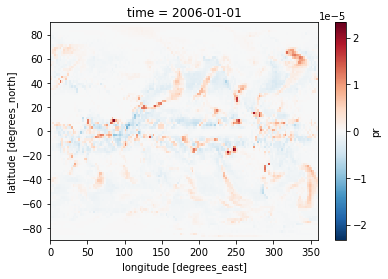

In [33]:
(ds_gra_season.pr[-1]-ds_gra_season2.pr[-1]).plot()  # Just checking there are NOT same

### 2.5 Hour

In [34]:
ds_gra_hour = ds.temporal.group_average("pr", freq="hour")

In [35]:
ds_gra_hour.pr.shape

(2190, 90, 144)

In [36]:
ds_gra_hour.pr[0] - ds.pr[0]

<xarray.DataArray 'pr' (lat: 90, lon: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8

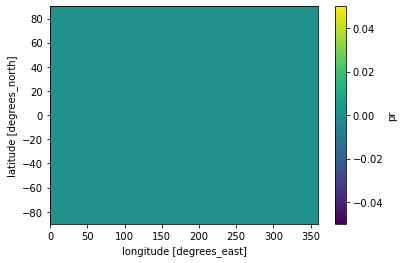

In [37]:
(ds_gra_hour.pr[-1]-ds.pr[-1]).plot()  # Just checking there ARE same